In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('balone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
for i in range(len(data['Sex'])):
    if data['Sex'][i] == 'F':
        data['Sex'][i] = -1
    elif data['Sex'][i] == 'I':
        data['Sex'][i] = 0
    else:
        data['Sex'][i] = 1
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
X = data.iloc[:,:-1] 
y = data.iloc[:,-1]

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits= 5, random_state = 1, shuffle = True)

In [44]:
scores = dict()

In [48]:
import sklearn.metrics
from tqdm import tqdm
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
for i in tqdm(range(1, 51)):
    scores[i]=[]
    clf = RandomForestRegressor(n_estimators = i, random_state = 1)
    clf.fit(X, y)
    score = cross_val_score(clf, X, y, cv = kf, scoring = 'r2')
    scores[i].append(round(mean(score), 2))

100%|██████████| 50/50 [02:56<00:00,  3.53s/it]


In [49]:
sort = sorted(scores.items(), key=lambda x: x[0], reverse=True)
for i in sort:
	print(i[0], i[1])

50 [0.53]
49 [0.53]
48 [0.53]
47 [0.53]
46 [0.53]
45 [0.53]
44 [0.53]
43 [0.53]
42 [0.53]
41 [0.53]
40 [0.53]
39 [0.53]
38 [0.53]
37 [0.53]
36 [0.53]
35 [0.53]
34 [0.53]
33 [0.53]
32 [0.53]
31 [0.53]
30 [0.53]
29 [0.53]
28 [0.53]
27 [0.52]
26 [0.52]
25 [0.52]
24 [0.52]
23 [0.52]
22 [0.52]
21 [0.52]
20 [0.52]
19 [0.52]
18 [0.52]
17 [0.51]
16 [0.51]
15 [0.51]
14 [0.51]
13 [0.5]
12 [0.5]
11 [0.49]
10 [0.5]
9 [0.49]
8 [0.48]
7 [0.48]
6 [0.47]
5 [0.47]
4 [0.44]
3 [0.41]
2 [0.34]
1 [0.11]


# Ответ: 28

# 2

In [15]:
import pandas as pd
import numpy as np
import sklearn
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=42)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
for i in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, 
                                     random_state=241, learning_rate = i)
    stg = clf.staged_decision_function(X_train)

In [22]:
print(stg)

<generator object GradientBoostingClassifier.staged_decision_function at 0x000001A60FB939C8>


Iter       Train Loss   Remaining Time 
         1           0.9702           23.84s
         2           0.8545           23.88s
         3           0.7683           24.41s
         4           0.6936           22.87s
         5           0.6607           23.21s
         6           0.6001           21.98s
         7           0.5658           20.94s
         8           0.5447           20.15s
         9           0.5155           20.20s
        10           0.4857           20.35s
        20           0.2281           18.46s
        30           0.1289           17.89s
        40           0.0877           17.22s
        50           0.0620           16.17s
        60           0.0414           14.95s
        70           0.0281           13.94s
        80           0.0188           13.05s
        90           0.0133           12.52s
       100           0.0092           12.17s
       200           0.0004            4.25s
1.4639201787590133


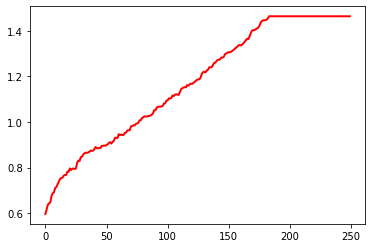

Iter       Train Loss   Remaining Time 
         1           1.0910           18.68s
         2           0.9724           18.67s
         3           0.8760           17.99s
         4           0.8128           17.86s
         5           0.7601           18.91s
         6           0.7137           20.08s
         7           0.6763           19.77s
         8           0.6600           19.94s
         9           0.6340           20.86s
        10           0.6118           20.99s
        20           0.4100           19.05s
        30           0.2665           18.63s
        40           0.2010           17.47s
        50           0.1517           16.43s
        60           0.1201           15.34s
        70           0.0938           14.53s
        80           0.0724           13.62s
        90           0.0618           12.85s
       100           0.0502           11.93s
       200           0.0059            3.72s
1.0621011676988972


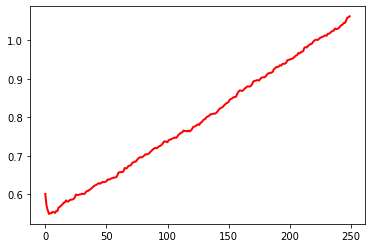

Iter       Train Loss   Remaining Time 
         1           1.1863           23.85s
         2           1.0749           23.52s
         3           0.9970           21.15s
         4           0.9404           19.45s
         5           0.8895           18.38s
         6           0.8471           19.06s
         7           0.8017           19.53s
         8           0.7656           18.86s
         9           0.7315           18.27s
        10           0.7060           18.58s
        20           0.5562           16.75s
        30           0.4380           15.37s
        40           0.3589           14.99s
        50           0.2887           14.17s
        60           0.2450           13.27s
        70           0.2072           12.33s
        80           0.1805           11.65s
        90           0.1594           10.88s
       100           0.1323           10.15s
       200           0.0275            3.35s
0.8350239484592973


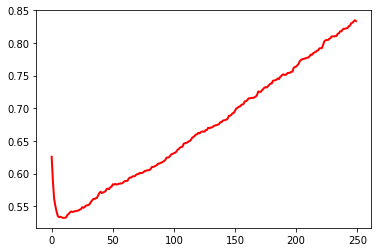

Iter       Train Loss   Remaining Time 
         1           1.2452           25.08s
         2           1.1490           24.24s
         3           1.0778           21.68s
         4           1.0255           19.87s
         5           0.9762           18.70s
         6           0.9297           17.87s
         7           0.8981           18.44s
         8           0.8655           18.91s
         9           0.8377           19.30s
        10           0.8191           18.93s
        20           0.6407           16.50s
        30           0.5674           15.70s
        40           0.4894           14.97s
        50           0.4220           14.04s
        60           0.3573           13.09s
        70           0.3241           12.53s
        80           0.2875           11.85s
        90           0.2544           11.12s
       100           0.2309           10.34s
       200           0.0845            3.38s
0.7135890948969514
i = 2 20
0.5296817949404468


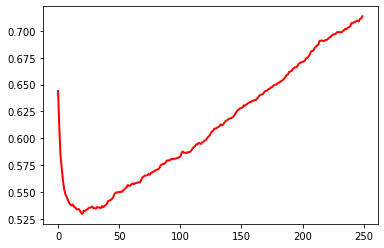

Iter       Train Loss   Remaining Time 
         1           1.3118           23.79s
         2           1.2508           19.51s
         3           1.1985           20.68s
         4           1.1550           20.53s
         5           1.1170           20.86s
         6           1.0853           19.99s
         7           1.0563           19.24s
         8           1.0278           18.58s
         9           1.0035           18.98s
        10           0.9814           18.62s
        20           0.8103           16.41s
        30           0.7103           15.49s
        40           0.6475           14.67s
        50           0.5952           13.85s
        60           0.5599           13.28s
        70           0.5209           12.61s
        80           0.4921           11.79s
        90           0.4602           11.13s
       100           0.4314           10.40s
       200           0.2327            3.35s
0.6660053557462874


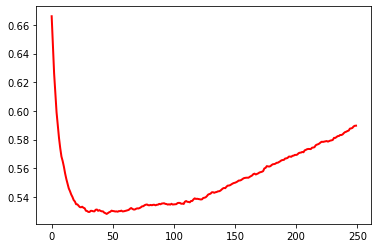

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
for i in [1, 0.5, 0.3, 0.2, 0.1]:
    cf=GradientBoostingClassifier( n_estimators=250, verbose=True, random_state=241,learning_rate=i)
    cf.fit(X_train,y_train)
    test_loss = np.empty(250)
    for m, y_decision in enumerate(cf.staged_decision_function(X_test)):
        y_pred_test = 1.0/(1.0 + np.exp(-y_decision))
        test_loss[m] = log_loss(y_test, y_pred_test)
    print(test_loss.max())
    if i==0.2:
        print('i = 2',min(range(len(test_loss)), key=test_loss.__getitem__))
        print(test_loss.min())

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 25, random_state = 241)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)

In [66]:
loss = sklearn.metrics.log_loss(y_test, y_pred)

In [67]:
loss

0.5786843062424291